In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.shape

(768, 9)

In [8]:
#creating a correlation matrix

corr_matrix = data.corr()
top_corr_features = corr_matrix.index


<Figure size 1440x1440 with 0 Axes>

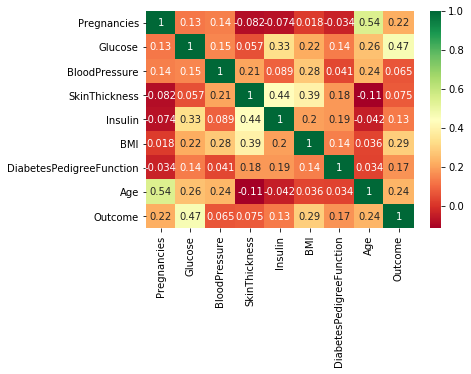

<Figure size 1440x1440 with 0 Axes>

In [9]:
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.figure(figsize=(20,20))

In [10]:
true_and_false_values = (data['Outcome'] == 0).value_counts()

In [11]:
true_and_false_values

True     500
False    268
Name: Outcome, dtype: int64

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
x = data.iloc[:,:-1].values
y = data['Outcome'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

## Finding the missing(zeros) in the dataset

In [15]:
print('total no. of rows : {0}'.format(len(data)))
print('number of rows missing in Pregnancies: {0}'.format(len(data.loc[data['Pregnancies']==0])))
print('number of rows missing in Glucose: {0}'.format(len(data.loc[data['Glucose']==0])))
print('number of rows missing in BloodPressure: {0}'.format(len(data.loc[data['BloodPressure']==0])))
print('number of rows missing in SkinThickness: {0}'.format(len(data.loc[data['SkinThickness']==0])))
print('number of rows missing in Insulin: {0}'.format(len(data.loc[data['Insulin']==0])))
print('number of rows missing in BMI: {0}'.format(len(data.loc[data['BMI']==0])))
print('number of rows missing in DiabetesPedigreeFunction: {0}'.format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print('number of rows missing in Age: {0}'.format(len(data.loc[data['Age']==0])))

total no. of rows : 768
number of rows missing in Pregnancies: 111
number of rows missing in Glucose: 5
number of rows missing in BloodPressure: 35
number of rows missing in SkinThickness: 227
number of rows missing in Insulin: 374
number of rows missing in BMI: 11
number of rows missing in DiabetesPedigreeFunction: 0
number of rows missing in Age: 0


## Using Imputer to replace all the zeros with the mean value


In [16]:
from sklearn.preprocessing import Imputer

In [17]:
fill_values = Imputer(missing_values=0, strategy='mean', axis=0)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
x_train = fill_values.fit_transform(x_train)
x_test = fill_values.fit_transform(x_test)

## Applying the Algorithm

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
random_forest_classifier = RandomForestClassifier()

In [21]:
random_forest_classifier.fit(x_train, y_train.ravel())

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
predict_train_data = random_forest_classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
accuracy = accuracy_score(y_test, predict_train_data)

In [25]:
print("The accuracy score is : {0}".format(accuracy))

The accuracy score is : 0.7445887445887446


In [26]:
conf_matrix = confusion_matrix(y_test, predict_train_data)

In [27]:
conf_matrix

array([[130,  14],
       [ 45,  42]])

In [28]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression